# Import necessary packages

In [1]:
import scipy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import scipy.stats as stats

print 'scipy = %s' % sc.__version__
print 'numpy = %s' % np.__version__
print 'pandas = %s' % pd.__version__
print 'seaborn = %s' % sns.__version__
print 'matplotlib = %s' % mpl.__version__

sns.set_style('whitegrid')
%matplotlib inline

scipy = 1.0.0
numpy = 1.10.2
pandas = 0.22.0
seaborn = 0.8.0
matplotlib = 2.1.1


# Import user-defined functions

In [2]:
def txt_to_df(filename,header=0):
    
    return pd.read_csv(filename,sep='\t',header=header,index_col=0)


def shortTaxonomy(series):
    '''
    given taxonomic classification of an OTU (in pandas.Series),
    create a shortname and indicate font style for each component
    '''
    
    series = series.fillna('')
    
    for level in ['species','genus','family','order','class','phylum']:
        
        if series[level] != '':
            
            topLevel = series[level]
                        
            if level == 'species':
                return ['%s %s %s' % (series['genus'],series['species'],series['otu_id']), (1,1)]
            elif level == 'genus':
                return ['%s sp. %s' % (series[level],series['otu_id']), (1,0)]
            else: 
                return ['%s sp. %s' % (series[level],series['otu_id']), (0,0)]     

def pointOutOTU(ax,name,xy,xytext,ha):
    
    ax.annotate(name,xy=xy,xytext=xytext,
                textcoords='data',xycoords='data',
                size=16,va="center",ha=ha,
                arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.2",color='black'))


# Import tables

**Import summary statistics**

In [3]:
filename = '../generate_tables/tables/supp_2_20180218.txt'
summary_df = txt_to_df(filename); print summary_df.shape

(100, 23)


**Import OTU abundance table**

In [4]:
filename = '../generate_data/input_data/suscpetibility/otus.ygbr.day.2.txt'
otus_df = txt_to_df(filename); print otus_df.shape
#otus_df = otus_df.loc[:,features.index]

(76, 4181)


**Import mapping table**

In [5]:
filename = '../generate_data/input_data/suscpetibility/outcomes.ygbr.day.2.txt'
mapping_df = txt_to_df(filename); print mapping_df.shape
mapping_df.columns = ['label']

(76, 1)


In [6]:
mapping_df.head()

,label
#SampleID,
SMIC.003.01.Day.02,1.0
SMIC.004.01.Day.02,0.0
SMIC.005.01.Day.02,1.0
SMIC.006.01.Day.02,0.0
SMIC.006.02.Day.02,0.0


## Plot figure

In [7]:
summary_df[summary_df.loc[:,'mlr']<-2]

,rank,coef,abs_coef,mean,mean_0,mean_1,mlr,prev,prev_0,prev_1,...,i_coef_h,i_pvalue,kingdom,phylum,class,order,family,genus,species,otu_id
Feature,,,,,,,,,,,,,,,,,,,,,
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus;s__;otu__134726,32,-0.053718,0.053718,0.001915,0.002694,0.000004,-2.748339,0.197368,0.259259,0.045455,...,0.077921,0.092057,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,NaN,134726
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;g__Prevotella;s__;otu__227285,34,-0.041201,0.041201,0.000461,0.000649,0.000000,-2.812781,0.131579,0.185185,0.000000,...,0.078156,0.090789,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella,NaN,227285


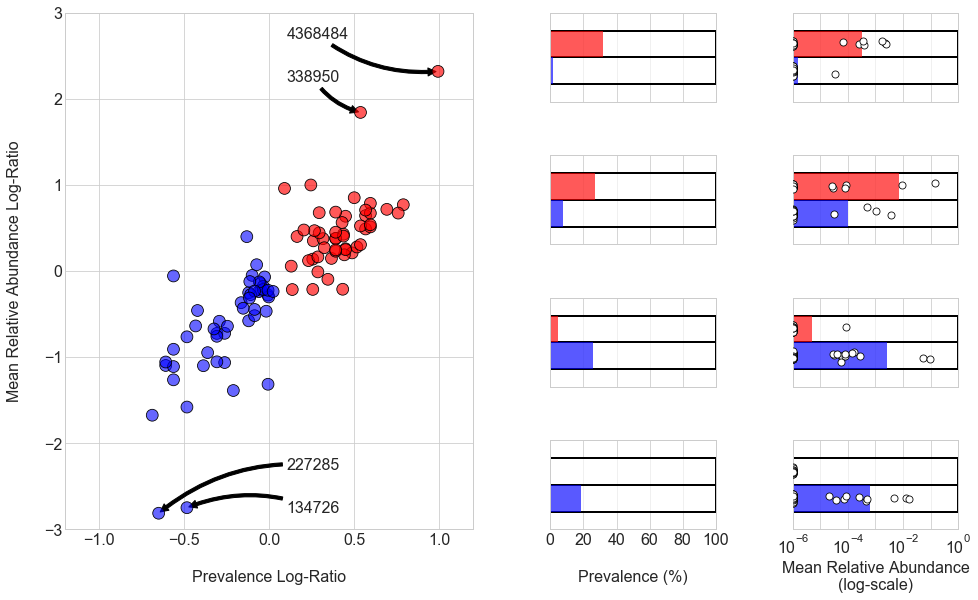

In [14]:
sns.set_style('whitegrid')

fig = plt.figure(figsize=[16,9.5])

gs = gridspec.GridSpec(4,12)

ax = plt.subplot(gs[:,0:6])

taxonomy_keys = ['kingdom','phylum','class','order','family','genus','species','otu_id']

xy = summary_df.loc[:,['plr','mlr']]

x = xy['plr']
y = xy['mlr']

c = [(1,0,0,0.65) if ii else (0,0,1,0.6) for ii in (summary_df.coef>0).values]

ax.scatter(x,y,s=140,zorder=5,
           color=c,edgecolor='black',lw=0.8)

ax.set_xlim([-1.2,1.2])
ax.set_ylim([-3.0,3.0])

ax.set_xlabel('\nPrevalence Log-Ratio',fontsize=16)
ax.set_ylabel('Mean Relative Abundance Log-Ratio\n',fontsize=16)

[ii.set(fontsize=16) for ii in ax.get_xticklabels()+ax.get_yticklabels()];

## highlight select OTUs

insets = xy.join(summary_df.loc[:,taxonomy_keys])
insets = insets[insets.loc[:,'mlr'].abs()>1.8].sort_values(['mlr'])
  
sub = insets.iloc[0,:]; pointOutOTU(ax,sub['otu_id'],sub[['plr','mlr']],[0.1,-2.25],"left")
sub = insets.iloc[1,:]; pointOutOTU(ax,sub['otu_id'],sub[['plr','mlr']],[0.1,-2.75],"left")
sub = insets.iloc[2,:]; pointOutOTU(ax,sub['otu_id'],sub[['plr','mlr']],[0.1,2.25],"left")
sub = insets.iloc[3,:]; pointOutOTU(ax,sub['otu_id'],sub[['plr','mlr']],[0.1,2.75],"left")

#### Prevalence plots

for row,idx in enumerate(insets.sort_values(['mlr'],ascending=False).index):

    ax = plt.subplot(gs[row,6:9])
    
    prev_0 = summary_df.loc[idx,'prev_0']
    prev_1 = summary_df.loc[idx,'prev_1']

    ax.barh(0.20,width=1,left=0,height=0.3,color=(1,1,1,0.65),edgecolor='black',lw=2,align='edge')
    ax.barh(0.50,width=1,left=0,height=0.3,color=(1,1,1,0.65),edgecolor='black',lw=2,align='edge')

    ax.barh(0.20,width=prev_0,left=0,height=0.3,color=(0,0,1,0.65),align='edge')
    ax.barh(0.50,width=prev_1,left=0,height=0.3,color=(1,0,0,0.65),align='edge')

    ax.set_xlim([0,1.0])
    ax.set_ylim([0,1.0])

    ax.yaxis.grid(False)

    [ax.spines[sp].set_visible(False) for sp in []]

    [ii.set(fontsize=16) for ii in ax.get_xticklabels()+ax.get_yticklabels()]

    if row==3:
        plt.setp(ax,xticks=[0,0.2,0.4,0.6,0.8,1.0],xticklabels=['0','20','40','60','80','100'])
    else:
        plt.setp(ax,xticks=[0,0.2,0.4,0.6,0.8,1.0],xticklabels=[])
               
    plt.setp(ax,yticks=[],yticklabels=[])

ax.set_xlabel('\nPrevalence (%)',fontsize=16)

### Relative Abundance

for row,idx in enumerate(insets.sort_values(['mlr'],ascending=False).index):
    
    ax = plt.subplot(gs[row,9:12])
    
    mean_0 = summary_df.loc[idx,'mean_0']
    mean_1 = summary_df.loc[idx,'mean_1']

    ax.barh(0.20,width=1,left=1e-6,height=0.30,color=(1,1,1,0.65),edgecolor='black',lw=2,align='edge')
    ax.barh(0.50,width=1,left=1e-6,height=0.30,color=(1,1,1,0.65),edgecolor='black',lw=2,align='edge')

    ax.barh(0.20,width=mean_0,left=1e-6,height=0.30,color=(0,0,1,0.65),align='edge')
    ax.barh(0.50,width=mean_1,left=1e-6,height=0.30,color=(1,0,0,0.65),align='edge')

    ax.set_xscale('log')

    ax.yaxis.grid(False)

    [ii.set(fontsize=16) for ii in ax.get_xticklabels()+ax.get_yticklabels()]
    
    if row==3:
        print
        #pplt.setp(ax,xticks=ax.get_xticks(),xticklabels=ax.get_xticklabels())
        plt.setp(ax,
                 xticks=[10**-6,10**-5,10**-4,10**-3,10**-2,10**-1,10**0],
                 xticklabels=['$\\mathdefault{10^{-6}}$','',
                              '$\\mathdefault{10^{-4}}$','',
                              '$\\mathdefault{10^{-2}}$','',
                              '$\\mathdefault{10^{0}}$'])
    else:
        plt.setp(ax,
                 xticks=[10**-6,10**-5,10**-4,10**-3,10**-2,10**-1,10**0],
                 xticklabels=[])

    plt.setp(ax,yticks=[],yticklabels=[])

    ax.set_xlim([10**-6,10**0])
    ax.set_ylim([0,1.0])


for row,idx in enumerate(insets.sort_values(['mlr'],ascending=False).index):

    ax = plt.subplot(gs[row,9:12])

    g0 = mapping_df[mapping_df.label==0].index
    g1 = mapping_df[mapping_df.label==1].index
    
    a0 = (otus_df.loc[g0,idx]+1e-6).values
    a1 = (otus_df.loc[g1,idx]+1e-6).values

    lower,upper = 0.20,0.50
    mu,sigma =0.35,0.025
    X = stats.truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
    y0_jitters= stats.norm(loc=mu, scale=sigma).rvs(len(a0))

    lower,upper = 0.50,0.80
    mu,sigma =0.65,0.02
    X = stats.truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
    y1_jitters= stats.norm(loc=mu, scale=sigma).rvs(len(a1))
    
    ax.scatter(a0,y0_jitters,s=50,color=(1,1,1,1),edgecolor='black',lw=0.8,zorder=10)
    ax.scatter(a1,y1_jitters,s=50,color=(1,1,1,1),edgecolor='black',lw=0.8,zorder=10)


ax.set_xlabel('Mean Relative Abundance\n(log-scale)',fontsize=16)

plt.subplots_adjust(wspace=20,hspace=0.6)
plt.savefig('./figs/midani_supp_figure_4_effect_sizes.pdf',filetype='pdf')

**Downstream annotations (labels and titles) were added in Adobe Illustrator**